In [ ]:
# prompt: connect google drive
from google.colab import drive
drive.mount('/content/drive')

In [23]:
import pandas as pd

# Load the CSV file
file_path = '/content/drive/MyDrive/NLP MINI PROJECT/data_to_be_cleansed.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Unnamed: 0,text,title,target
0,0,Welcome to /r/depression's check-in post - a p...,"Regular check-in post, with information about ...",1
1,1,We understand that most people who reply immed...,Our most-broken and least-understood rules is ...,1
2,2,Anyone else just miss physical touch? I crave ...,"I haven’t been touched, or even hugged, in so ...",1
3,3,I’m just so ashamed. Everyone and everything f...,Being Depressed is Embarrassing,1
4,4,I really need a friend. I don't even have a si...,I'm desperate for a friend and to feel loved b...,1


In [24]:
df1 = df.drop(df.columns[0], axis=1)

In [25]:
df1 = df1.drop(df.columns[2], axis=1)

In [26]:
df1.head()

,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1


In [27]:
# Load the CSV file
file_path = '/content/drive/MyDrive/NLP MINI PROJECT/depression_dataset_reddit_cleaned.csv'
df2 = pd.read_csv(file_path)

In [28]:
df2.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [29]:
df2.shape

(7731, 2)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [31]:
df2['is_depression'].value_counts()

,count
is_depression,
0,3900
1,3831


In [32]:
# Drop rows where 'is_depression' is equal to 1
df2 = df2.drop(df2[df2['is_depression'] == 1].index)
df2.head()

,clean_text,is_depression
3831,switchfoot http twitpic com y zl awww that s a...,0
3832,is upset that he can t update his facebook by ...,0
3833,kenichan i dived many time for the ball manage...,0
3834,my whole body feel itchy and like it on fire,0
3835,nationwideclass no it s not behaving at all i ...,0


In [33]:
# Replace 'is_depression' values of 0 with 5
df2['target'] = df2['is_depression'].replace(0, 5)
df2.drop('is_depression', axis=1, inplace=True)

In [34]:
# Replace name 'clean_text' with 'text'
df2.rename(columns={'clean_text': 'text'}, inplace=True)
df2.head()

,text,target
3831,switchfoot http twitpic com y zl awww that s a...,5
3832,is upset that he can t update his facebook by ...,5
3833,kenichan i dived many time for the ball manage...,5
3834,my whole body feel itchy and like it on fire,5
3835,nationwideclass no it s not behaving at all i ...,5


In [35]:
df2 = df2.sample(n=1200, random_state=42)  # Use random_state for reproducibility

In [36]:
df2.shape

(1200, 2)

In [37]:
# Merge the two dataframes
df_new = pd.concat([df1, df2], ignore_index=True)

# Display the first few rows of the merged dataframe
df_new.head()


,text,target
0,Welcome to /r/depression's check-in post - a p...,1
1,We understand that most people who reply immed...,1
2,Anyone else just miss physical touch? I crave ...,1
3,I’m just so ashamed. Everyone and everything f...,1
4,I really need a friend. I don't even have a si...,1


In [ ]:
'''import pandas as pd

# Load the CSV file, specifying the encoding
file_path = '/content/drive/MyDrive/NLP MINI PROJECT/cleaned_nlp_data(nlp project).csv'
df_new = pd.read_csv(file_path, encoding='latin-1') # Try 'latin-1' or 'cp1252''''

# Display the first few rows
df_new.head()

SyntaxError: unterminated string literal (detected at line 5) (<ipython-input-15-ea6b4b4529bc>, line 5)

In [38]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7157 entries, 0 to 7156
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    6807 non-null   object
 1   target  7157 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.0+ KB


In [39]:
df_new.shape

(7157, 2)

In [40]:
df_new['target'].value_counts()

,count
target,
1,1202
3,1201
5,1200
4,1188
2,1185
0,1181


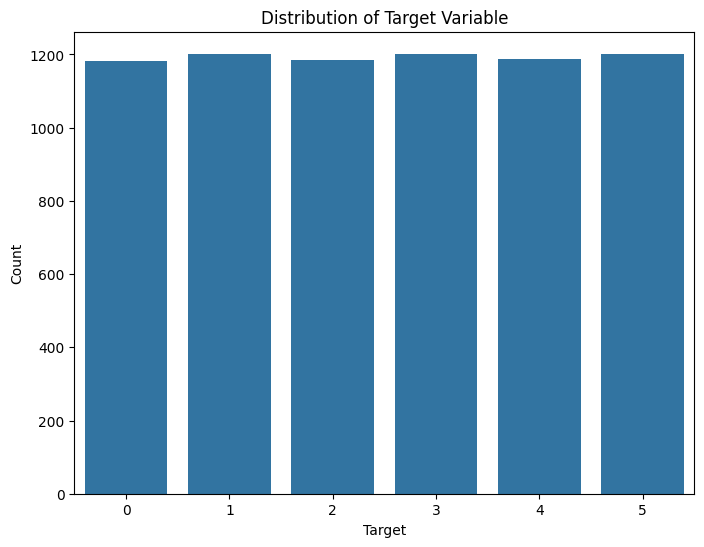

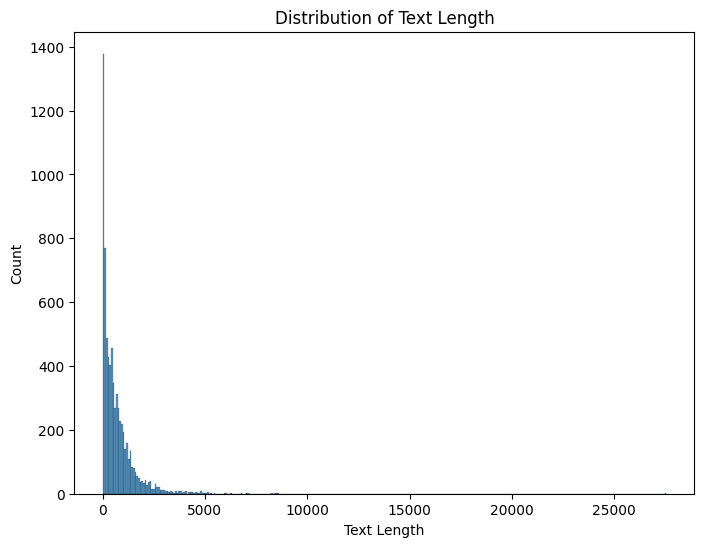

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_new)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# You can also visualize other aspects of the dataset, such as:
# - Word cloud of the text data
# - Length distribution of text data
# - Correlation between features (if applicable)

# Example of visualizing text length
# Handle missing values in 'text' column before calculating length
df_new['text_length'] = df_new['text'].astype(str).apply(len)  # Convert to string to handle NaN
plt.figure(figsize=(8, 6))
sns.histplot(df_new['text_length'])
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

In [43]:
import re

def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)

    # Remove Reddit user mentions (e.g., /u/username)
    text = re.sub(r'/u/\w+', '', text)

    # Remove Reddit subreddit mentions (e.g., /r/subredditname)
    text = re.sub(r'/r/\w+', '', text)

    # Remove special characters and numbers
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply the cleaning function
df_new['cleaned_text'] = df_new['text'].apply(lambda x: clean_text(str(x)))

In [44]:
df_new.head()

,text,target,text_length,cleaned_text
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...


In [45]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=4e5174210879d28f18b04ee11b7d3bd3e72462ea3dc4daab98175337cb817927
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [46]:
from langdetect import detect

def detect_language(text):
    try:
        return detect(text)
    except:
        return 'unknown'  # For cases where detection might fail

# Detect language
df_new['text_language'] = df_new['cleaned_text'].apply(lambda x: detect_language(str(x)))

In [47]:
# Display the data with language detection
df_new.head()

,text,target,text_length,cleaned_text,text_language
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en


In [48]:
# Remove rows where 'text_language' is english
df_new = df_new[df_new['text_language'] == 'en']

# Display the updated DataFrame
df_new.head()


,text,target,text_length,cleaned_text,text_language
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en


In [49]:
df_new.shape

(6642, 5)

In [ ]:
# prompt: downlaod dataset

from google.colab import files

# Assuming 'df_new' is your DataFrame
df_new.to_csv('cleaned_dataset.csv', encoding='utf-8', index=False)

# Download the CSV file
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
df_new['target'].value_counts()

,count
target,
1,1191
4,1140
5,1115
2,1085
3,1058
0,1053


In [57]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [58]:
import nltk
from indicnlp.tokenize import indic_tokenize

nltk.download('punkt')

def tokenize_text(text, language):
    if language == 'en':  # English
        return nltk.word_tokenize(text)
    elif language in ['hi', 'mr']:  # Hindi or Marathi
        return indic_tokenize.trivial_tokenize(text)
    else:
        return text.split()  # Fallback for unknown or Hinglish (could be custom tokenization)

# Apply tokenization based on detected language
df_new['tokens'] = df_new.apply(lambda row: tokenize_text(row['cleaned_text'], row['text_language']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [59]:
df_new.head()

,text,target,text_length,cleaned_text,text_language,tokens
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en,"[Welcome, to, s, checkin, post, a, place, to, ..."
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en,"[We, understand, that, most, people, who, repl..."
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en,"[Anyone, else, just, miss, physical, touch, I,..."
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en,"[Im, just, so, ashamed, Everyone, and, everyth..."
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en,"[I, really, need, a, friend, I, dont, even, ha..."


In [60]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Get the stopwords for English (you can extend this to other languages)
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(tokens): # Change the argument name to 'tokens' for clarity
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words] # Remove split since tokens is a list
    return ' '.join(filtered_tokens)  # Join tokens back into a string

# Apply stopword removal to the 'cleaned_text' column
df_new['new_tokens'] = df_new['tokens'].apply(remove_stopwords) # Apply the modified function

# Display the cleaned text
print(df_new['cleaned_text'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Welcome to s checkin post a place to take a mo...
1    We understand that most people who reply immed...
2    Anyone else just miss physical touch I crave i...
3    Im just so ashamed Everyone and everything fee...
4    I really need a friend I dont even have a sing...
Name: cleaned_text, dtype: object


In [61]:
df_new.head()

,text,target,text_length,cleaned_text,text_language,tokens,new_tokens
0,Welcome to /r/depression's check-in post - a p...,1,2644,Welcome to s checkin post a place to take a mo...,en,"[Welcome, to, s, checkin, post, a, place, to, ...",Welcome checkin post place take moment share g...
1,We understand that most people who reply immed...,1,4792,We understand that most people who reply immed...,en,"[We, understand, that, most, people, who, repl...",understand people reply immediately OP invitat...
2,Anyone else just miss physical touch? I crave ...,1,58,Anyone else just miss physical touch I crave i...,en,"[Anyone, else, just, miss, physical, touch, I,...",Anyone else miss physical touch crave badly
3,I’m just so ashamed. Everyone and everything f...,1,905,Im just so ashamed Everyone and everything fee...,en,"[Im, just, so, ashamed, Everyone, and, everyth...",Im ashamed Everyone everything feels far away ...
4,I really need a friend. I don't even have a si...,1,237,I really need a friend I dont even have a sing...,en,"[I, really, need, a, friend, I, dont, even, ha...",really need friend dont even single best frien...


In [62]:
import spacy

# Load spaCy model for English
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text, language):
    if language == 'en':
        doc = nlp(text)
        return [token.lemma_ for token in doc]
    else:
        return text  # For now, returning as-is for Hindi/Marathi

# Apply lemmatization
df_new['lemmas'] = df_new.apply(lambda row: lemmatize_text(row['new_tokens'], row['text_language']), axis=1)


In [63]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary resources
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get wordnet POS tag for accurate lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if no POS tag found

# Function to lemmatize a text
def lemmatize_text(text):
    tokens = text.split()  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the 'cleaned_text' column
df_new['new_lemmas'] = df_new['new_tokens'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


KeyboardInterrupt: 

In [ ]:
df_new.head()

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features for efficiency

# Fit and transform the cleaned text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_new['cleaned_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF features
tfidf_df.head()'''

,05,10,100,1000,100mg,10mg,11,12,120,1200mg,...,youth,youtube,youve,yrs,zeebie,zero,zoloft,zombie,zone,zyprexa
0,0.0,0.037221,0.042915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.053757,0.0
1,0.0,0.000000,0.028885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.033876,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
'''from gensim.models import Word2Vec
import numpy as np

# Prepare tokenized sentences for Word2Vec
sentences = df_new['tokens'].tolist()

# Create a Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Generate Word2Vec embeddings for each sentence by averaging word vectors
def get_avg_word2vec(tokens, model):
    # Get vectors for each word in the tokens
    vectors = [model.wv[word] for word in tokens if word in model.wv]

    # Return the average vector for the sentence
    return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(100)

# Apply the function to get embeddings for each sentence
df_new['word2vec_embedding'] = df_new['tokens'].apply(lambda x: get_avg_word2vec(x, word2vec_model))

# Display the embeddings
df_new['word2vec_embedding'].head()'''

KeyboardInterrupt: 

Feature Engineering

In [52]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
from tqdm import tqdm

# Check if a GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').to(device)

# Function to get BERT embeddings for a batch of texts
def get_bert_embeddings_batch(texts, batch_size=32):
    embeddings = []
    model.eval()  # Set model to evaluation mode (disables dropout)

    # Process in batches
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]

        # Tokenize the batch of texts
        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True,
                           padding=True, max_length=128, add_special_tokens=True)

        # Move inputs to device
        inputs = {key: value.to(device) for key, value in inputs.items()}

        with torch.no_grad():
            outputs = model(**inputs)

        # Get the hidden states from BERT (last layer)
        last_hidden_state = outputs.last_hidden_state

        # Average the embeddings across tokens for each sentence (axis=1)
        batch_embeddings = torch.mean(last_hidden_state, axis=1).cpu().numpy()
        embeddings.append(batch_embeddings)

    # Concatenate all batch embeddings into a single array
    return np.vstack(embeddings)

# Apply the optimized BERT embedding function to the entire cleaned text column in batches
texts = df_new['new_lemmas'].tolist()  # Convert column to list for batch processing
bert_embeddings = get_bert_embeddings_batch(texts, batch_size=32)

# Save embeddings back to DataFrame (if necessary)
df_new['bert_embedding'] = list(bert_embeddings)

# Display the first few embeddings
print(df_new['bert_embedding'].head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

KeyError: 'new_lemmas'

In [ ]:
df_new.head()

,text,target,cleaned_text,text_language
0,Welcome to /r/depression's check-in post - a p...,1,Welcome to s checkin post a place to take a mo...,en
1,We understand that most people who reply immed...,1,We understand that most people who reply immed...,en
2,Anyone else just miss physical touch? I crave ...,1,Anyone else just miss physical touch I crave i...,en
3,I’m just so ashamed. Everyone and everything f...,1,Im just so ashamed Everyone and everything fee...,en
4,I really need a friend. I don't even have a si...,1,I really need a friend I dont even have a sing...,en


In [65]:
!pip install transformers datasets torch

In [ ]:
# Import necessary libraries
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from sklearn.model_selection import train_test_split
from datasets import Dataset
import pandas as pd

# Load dataset (Assuming df_new has 'cleaned_text' and 'labels' columns)
# Replace 'labels' column with your target (0: Stress, 1: Depression, etc.)
df = df_new[['cleaned_text', 'target']]  # Replace 'labels' with actual target column name

# Train-validation split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['cleaned_text'].tolist(), df['target'].tolist(), test_size=0.2, random_state=42
)

# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the texts for both training and validation sets
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)

# Convert the data into Hugging Face Dataset format
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})

val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})

# Load pretrained BERT model for sequence classification with 5 output classes
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Define Training Arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
)

# Define the Trainer for training the BERT model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Save the fine-tuned model
model.save_pretrained('./depression_classification_bert')
tokenizer.save_pretrained('./depression_classification_bert')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,1.171500,1.141190
2,0.749100,0.713538


Epoch,Training Loss,Validation Loss
1,1.171500,1.141190
2,0.749100,0.713538
3,0.458500,0.617667


In [64]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00


In [1]:


from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# Get predictions on the validation set
predictions = trainer.predict(val_dataset)

# Extract predicted labels and true labels
predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion)



NameError: name 'trainer' is not defined